In [286]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [287]:
df = pd.read_csv("matchup_stats.csv")

In [288]:
df

,gmDate,teamAbbr,teamDayOff,avg_poss,Off_Eff,Def_Eff,Net_Eff,Prev_EFG,Prev_TS,Prev_3Ppct,...,away_L10_TOP48,away_L10_ATORatio,away_L10_Win_Pct,away_L10_Opp_EFG,away_L10_Opp_TS,away_L10_SP48,away_L10_BP48,Line,MOV,Cover?
0,2012-10-30,CLE,0,88.940900,105.688200,94.444700,11.243500,0.500000,0.529995,0.350000,...,13.000000,2.000000,0.0,0.500000,0.529995,11.000000,10.000000,-6.0,10,Yes
1,2012-10-30,MIA,0,94.983200,126.338100,112.651500,13.686600,0.594937,0.644607,0.500000,...,16.000000,1.500000,0.0,0.594937,0.644607,4.000000,2.000000,-6.5,13,Yes
2,2012-10-30,LAL,0,91.579000,99.367800,108.103400,-8.735600,0.512987,0.501986,0.230769,...,12.000000,1.833333,0.0,0.512987,0.501986,9.000000,5.000000,-8.5,-8,No
3,2012-10-31,PHI,0,94.371500,89.009900,79.473100,9.536800,0.394118,0.445671,0.280000,...,22.000000,0.863636,0.0,0.394118,0.445671,9.000000,5.000000,2.0,9,Yes
4,2012-10-31,TOR,0,91.564100,96.107500,98.291800,-2.184300,0.395604,0.442834,0.352941,...,19.000000,1.157895,0.0,0.395604,0.442834,3.000000,10.000000,1.5,-2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,2018-04-11,ORL,2,98.320457,105.166778,110.320910,-5.154132,0.512067,0.544915,0.350190,...,15.480649,1.806452,0.3,0.542169,0.572646,7.290886,4.494382,6.0,9,Yes
7373,2018-04-11,PHI,1,100.298523,109.350380,105.228548,4.121832,0.534821,0.568240,0.367787,...,11.721612,2.191667,0.7,0.526316,0.565775,9.963370,5.274725,-6.0,35,Yes
7374,2018-04-11,LAC,2,98.772383,110.493546,110.357602,0.135943,0.527256,0.564630,0.353994,...,14.987755,1.549020,0.3,0.497805,0.529303,6.073469,4.114286,-2.5,-15,No
7375,2018-04-11,POR,2,96.857905,109.138401,106.588472,2.549930,0.511004,0.549319,0.366185,...,14.647423,1.871622,0.8,0.494118,0.532017,8.313402,5.740206,-2.0,9,Yes


In [342]:
len(df[df['Cover?'] == 'Push'])

0

I dropped push results for 2 reasons:
1. Keep it a binary classification model 
2. It's not particularly useful to predict push results as a misclassification of a push does not hurt model performance. If we predict home team to cover and it is a push, we do not lose any money.
3. Pushes occur at such a low frequency (~1.7% of results) that it creates a big imbalance in our dataset and it is ok to ignore for now.

In [290]:
df = df[df['Cover?'] != 'Push']

In [291]:
df

,gmDate,teamAbbr,teamDayOff,avg_poss,Off_Eff,Def_Eff,Net_Eff,Prev_EFG,Prev_TS,Prev_3Ppct,...,away_L10_TOP48,away_L10_ATORatio,away_L10_Win_Pct,away_L10_Opp_EFG,away_L10_Opp_TS,away_L10_SP48,away_L10_BP48,Line,MOV,Cover?
0,2012-10-30,CLE,0,88.940900,105.688200,94.444700,11.243500,0.500000,0.529995,0.350000,...,13.000000,2.000000,0.0,0.500000,0.529995,11.000000,10.000000,-6.0,10,Yes
1,2012-10-30,MIA,0,94.983200,126.338100,112.651500,13.686600,0.594937,0.644607,0.500000,...,16.000000,1.500000,0.0,0.594937,0.644607,4.000000,2.000000,-6.5,13,Yes
2,2012-10-30,LAL,0,91.579000,99.367800,108.103400,-8.735600,0.512987,0.501986,0.230769,...,12.000000,1.833333,0.0,0.512987,0.501986,9.000000,5.000000,-8.5,-8,No
3,2012-10-31,PHI,0,94.371500,89.009900,79.473100,9.536800,0.394118,0.445671,0.280000,...,22.000000,0.863636,0.0,0.394118,0.445671,9.000000,5.000000,2.0,9,Yes
4,2012-10-31,TOR,0,91.564100,96.107500,98.291800,-2.184300,0.395604,0.442834,0.352941,...,19.000000,1.157895,0.0,0.395604,0.442834,3.000000,10.000000,1.5,-2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,2018-04-11,ORL,2,98.320457,105.166778,110.320910,-5.154132,0.512067,0.544915,0.350190,...,15.480649,1.806452,0.3,0.542169,0.572646,7.290886,4.494382,6.0,9,Yes
7373,2018-04-11,PHI,1,100.298523,109.350380,105.228548,4.121832,0.534821,0.568240,0.367787,...,11.721612,2.191667,0.7,0.526316,0.565775,9.963370,5.274725,-6.0,35,Yes
7374,2018-04-11,LAC,2,98.772383,110.493546,110.357602,0.135943,0.527256,0.564630,0.353994,...,14.987755,1.549020,0.3,0.497805,0.529303,6.073469,4.114286,-2.5,-15,No
7375,2018-04-11,POR,2,96.857905,109.138401,106.588472,2.549930,0.511004,0.549319,0.366185,...,14.647423,1.871622,0.8,0.494118,0.532017,8.313402,5.740206,-2.0,9,Yes


In [292]:
df = df.rename(columns = {'teamAbbr':'Home', 'away_teamAbbr': 'Away'})

In [293]:
list(df.columns)

['gmDate',
 'Home',
 'teamDayOff',
 'avg_poss',
 'Off_Eff',
 'Def_Eff',
 'Net_Eff',
 'Prev_EFG',
 'Prev_TS',
 'Prev_3Ppct',
 'Prev_3PAP48',
 'Prev_FTpct',
 'Prev_FTAP48',
 'Prev_FTR',
 'ORBR',
 'DRBR',
 'AP48',
 'TOP48',
 'ATORatio',
 'Win_Pct',
 'Opp_EFG',
 'Opp_TS',
 'SP48',
 'BP48',
 'L10_avg_poss',
 'L10_Off_Eff',
 'L10_Def_Eff',
 'L10_Net_Eff',
 'L10_Prev_EFG',
 'L10_Prev_TS',
 'L10_3Ppct',
 'L10_3PAP48',
 'L10_FTpct',
 'L10_FTAP48',
 'L10_FTR',
 'L10_ORBR',
 'L10_DRBR',
 'L10_AP48',
 'L10_TOP48',
 'L10_ATORatio',
 'L10_Win_Pct',
 'L10_Opp_EFG',
 'L10_Opp_TS',
 'L10_SP48',
 'L10_BP48',
 'Official1',
 'Official2',
 'Official3',
 'Away',
 'away_teamDayOff',
 'away_avg_poss',
 'away_Off_Eff',
 'away_Def_Eff',
 'away_Net_Eff',
 'away_Prev_EFG',
 'away_Prev_TS',
 'away_Prev_3Ppct',
 'away_Prev_3PAP48',
 'away_Prev_FTpct',
 'away_Prev_FTAP48',
 'away_Prev_FTR',
 'away_ORBR',
 'away_DRBR',
 'away_AP48',
 'away_TOP48',
 'away_ATORatio',
 'away_Win_Pct',
 'away_Opp_EFG',
 'away_Opp_TS',
 '

In [294]:
df.dtypes.tolist()

[dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float6

I one-hot-encoded the categorical variables for use with Random Forest

In [295]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [296]:
categories = ['Home','Away','Official1','Official2','Official3']

In [297]:
ohe = OneHotEncoder()
for i in categories:
    transformed = ohe.fit_transform(df[[i]])
    col_names = [i + '_' + j for j in ohe.categories_[0]]
    df[col_names] = transformed.toarray()

In [298]:
df

,gmDate,Home,teamDayOff,avg_poss,Off_Eff,Def_Eff,Net_Eff,Prev_EFG,Prev_TS,Prev_3Ppct,...,Official3_Steven Anderson,Official3_Tom Washington,Official3_Tony Brothers,Official3_Tony Brown,Official3_Tre Maddox,Official3_Tyler Ford,Official3_Violet Palmer,Official3_Vladimir Voyard-Tadal,Official3_Zach Zarba,Official3_nan nan
0,2012-10-30,CLE,0,88.940900,105.688200,94.444700,11.243500,0.500000,0.529995,0.350000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-10-30,MIA,0,94.983200,126.338100,112.651500,13.686600,0.594937,0.644607,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-10-30,LAL,0,91.579000,99.367800,108.103400,-8.735600,0.512987,0.501986,0.230769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-10-31,PHI,0,94.371500,89.009900,79.473100,9.536800,0.394118,0.445671,0.280000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-10-31,TOR,0,91.564100,96.107500,98.291800,-2.184300,0.395604,0.442834,0.352941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,2018-04-11,ORL,2,98.320457,105.166778,110.320910,-5.154132,0.512067,0.544915,0.350190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7373,2018-04-11,PHI,1,100.298523,109.350380,105.228548,4.121832,0.534821,0.568240,0.367787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7374,2018-04-11,LAC,2,98.772383,110.493546,110.357602,0.135943,0.527256,0.564630,0.353994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7375,2018-04-11,POR,2,96.857905,109.138401,106.588472,2.549930,0.511004,0.549319,0.366185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
df = df.drop(['gmDate','MOV', 'Home','Away','Official1','Official2','Official3'], axis = 1)

In [307]:
col = df.pop('Cover?')
df.insert(379,col.name,col)

In [308]:
df

,teamDayOff,avg_poss,Off_Eff,Def_Eff,Net_Eff,Prev_EFG,Prev_TS,Prev_3Ppct,Prev_3PAP48,Prev_FTpct,...,Official3_Tom Washington,Official3_Tony Brothers,Official3_Tony Brown,Official3_Tre Maddox,Official3_Tyler Ford,Official3_Violet Palmer,Official3_Vladimir Voyard-Tadal,Official3_Zach Zarba,Official3_nan nan,Cover?
0,0,88.940900,105.688200,94.444700,11.243500,0.500000,0.529995,0.350000,20.000000,0.681818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,94.983200,126.338100,112.651500,13.686600,0.594937,0.644607,0.500000,16.000000,0.812500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,91.579000,99.367800,108.103400,-8.735600,0.512987,0.501986,0.230769,13.000000,0.387097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,94.371500,89.009900,79.473100,9.536800,0.394118,0.445671,0.280000,25.000000,0.809524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,91.564100,96.107500,98.291800,-2.184300,0.395604,0.442834,0.352941,17.000000,0.842105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,2,98.320457,105.166778,110.320910,-5.154132,0.512067,0.544915,0.350190,29.218141,0.756511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7373,1,100.298523,109.350380,105.228548,4.121832,0.534821,0.568240,0.367787,29.580967,0.752294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7374,2,98.772383,110.493546,110.357602,0.135943,0.527256,0.564630,0.353994,26.840565,0.746976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7375,2,96.857905,109.138401,106.588472,2.549930,0.511004,0.549319,0.366185,28.049555,0.801059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [309]:
df['Cover?'].unique()

array([1, 0])

In [300]:
df['Cover?'] = np.where(df['Cover?'] == 'Yes', 1, 0)

In [301]:
df['Cover?'] = df['Cover?'].astype('int')

In [310]:
df.head(15)

,teamDayOff,avg_poss,Off_Eff,Def_Eff,Net_Eff,Prev_EFG,Prev_TS,Prev_3Ppct,Prev_3PAP48,Prev_FTpct,...,Official3_Tom Washington,Official3_Tony Brothers,Official3_Tony Brown,Official3_Tre Maddox,Official3_Tyler Ford,Official3_Violet Palmer,Official3_Vladimir Voyard-Tadal,Official3_Zach Zarba,Official3_nan nan,Cover?
0,0,88.9409,105.6882,94.4447,11.2435,0.500000,0.529995,0.350000,20.0,0.681818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,94.9832,126.3381,112.6515,13.6866,0.594937,0.644607,0.500000,16.0,0.812500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,91.5790,99.3678,108.1034,-8.7356,0.512987,0.501986,0.230769,13.0,0.387097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,94.3715,89.0099,79.4731,9.5368,0.394118,0.445671,0.280000,25.0,0.809524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,91.5641,96.1075,98.2918,-2.1843,0.395604,0.442834,0.352941,17.0,0.842105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0,94.5665,101.5159,111.0330,-9.5171,0.481013,0.530739,0.375000,16.0,0.769231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0,95.9443,96.9312,90.6776,6.2536,0.430380,0.497220,0.222222,9.0,0.757576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0,95.0333,99.9650,104.1740,-4.2090,0.462500,0.527075,0.235294,17.0,0.913043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0,100.4758,112.4649,93.5549,18.9100,0.460674,0.525679,0.428571,14.0,0.738095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0,93.7904,90.6276,92.7600,-2.1324,0.425000,0.473907,0.190476,21.0,0.772727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [311]:
list(df.columns)

['teamDayOff',
 'avg_poss',
 'Off_Eff',
 'Def_Eff',
 'Net_Eff',
 'Prev_EFG',
 'Prev_TS',
 'Prev_3Ppct',
 'Prev_3PAP48',
 'Prev_FTpct',
 'Prev_FTAP48',
 'Prev_FTR',
 'ORBR',
 'DRBR',
 'AP48',
 'TOP48',
 'ATORatio',
 'Win_Pct',
 'Opp_EFG',
 'Opp_TS',
 'SP48',
 'BP48',
 'L10_avg_poss',
 'L10_Off_Eff',
 'L10_Def_Eff',
 'L10_Net_Eff',
 'L10_Prev_EFG',
 'L10_Prev_TS',
 'L10_3Ppct',
 'L10_3PAP48',
 'L10_FTpct',
 'L10_FTAP48',
 'L10_FTR',
 'L10_ORBR',
 'L10_DRBR',
 'L10_AP48',
 'L10_TOP48',
 'L10_ATORatio',
 'L10_Win_Pct',
 'L10_Opp_EFG',
 'L10_Opp_TS',
 'L10_SP48',
 'L10_BP48',
 'away_teamDayOff',
 'away_avg_poss',
 'away_Off_Eff',
 'away_Def_Eff',
 'away_Net_Eff',
 'away_Prev_EFG',
 'away_Prev_TS',
 'away_Prev_3Ppct',
 'away_Prev_3PAP48',
 'away_Prev_FTpct',
 'away_Prev_FTAP48',
 'away_Prev_FTR',
 'away_ORBR',
 'away_DRBR',
 'away_AP48',
 'away_TOP48',
 'away_ATORatio',
 'away_Win_Pct',
 'away_Opp_EFG',
 'away_Opp_TS',
 'away_SP48',
 'away_BP48',
 'away_L10_avg_poss',
 'away_L10_Off_Eff',
 '

In [312]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'

In [313]:
x = df.drop('Cover?', axis = 1)
y = df['Cover?']

In [314]:
y

0       1
1       1
2       0
3       1
4       0
       ..
7372    1
7373    1
7374    0
7375    1
7376    1
Name: Cover?, Length: 7252, dtype: int64

In [315]:
from sklearn.model_selection import train_test_split

In [316]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 1)
x_train.shape, x_test.shape
y_train.shape, y_test.shape

((5801,), (1451,))

In [317]:
from sklearn.ensemble import RandomForestClassifier

In [318]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10, min_samples_split = 20, n_estimators=100, oob_score=True)

In [319]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=20, n_jobs=-1,
                       oob_score=True, random_state=42)

In [320]:
rf.oob_score_

0.5026719531115325

In [321]:
preds = rf.predict(x_test)

In [322]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay as cmd

In [323]:
cm = confusion_matrix(y_test, preds, labels = rf.classes_)

<function matplotlib.pyplot.show(close=None, block=None)>

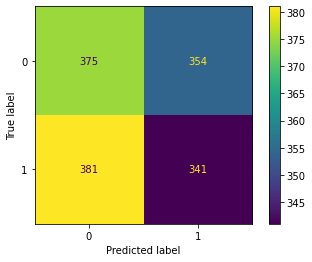

In [324]:
disp = cmd(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()
plt.show

In [325]:
from sklearn.model_selection import GridSearchCV

In [328]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'n_estimators': [25,40,50,75,100],
    'max_depth': [5,10,15,20,25,40,60],
    'min_samples_split': [2,4,5,6,8,10],
    'min_samples_leaf': [1,2,3,4,5],
}

In [329]:
grid_search = GridSearchCV(estimator = rf, param_grid = params, n_jobs = -1, verbose = 2, scoring = 'accuracy')

In [330]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, m

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   1.4s
[CV] END

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=25; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.9s
[CV] END 

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   1.5s
[CV] END 

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=40; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=40; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=75; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=75; total time=   1.3s
[CV] EN

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=75; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=40; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=75; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=75; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=25; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=75; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=75; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=25; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   0.8s
[CV] END

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=75; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=25; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=25; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   0.7s
[CV] END 

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=25; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=25; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=25; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=25; total time=   0.8

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=75; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=25; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=25; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=25; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=40; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=  

[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   2.7s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   2.7s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=25; total time=   0.9s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=40; total time=   1.6s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   1.8s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   2.8s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   2.8s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   3.8s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=40; total time=   1.5

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=40; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=75; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=40; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=75; total time=   2.6s

[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=40; total time=   1.5s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   1.9s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=75; total time=   2.8s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   3.7s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   3.9s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   1.4s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   2.7s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time

[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   2.0s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=75; total time=   2.6s
[CV] END max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   3.9s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   1.5s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   2.7s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   

[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=25; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   1.6s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   2.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   2.7s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   2.7s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=40; total time=   1.5s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=40; total time=   1.5s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   1.9s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   2.7s

[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=40; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   3.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   3.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   4.3s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=40; total time=   1.8s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=40; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   4.3

[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=40; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   3.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   4.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=25; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=25; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=25; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   2.0s

[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   3.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   4.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   4.4s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=40; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   3.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   4.2s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   4.4s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=40; total time=   

[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   1.4s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   2.3s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.6s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   3.7s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   3.7s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.2s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=40; total time=   2.1s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=40; total time=   2.1s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   2.5s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   4.0s

[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=8, n_estimators=40; total time=   2.2s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=8, n_estimators=40; total time=   1.8s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   2.8s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   4.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   5.3s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   5.3s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   2.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=75; total time=   4.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 

[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   2.4s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.5s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   3.9s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.1s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=25; total time=   1.3s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=25; total time=   1.2s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=25; total time=   1.4s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=40; total time=   2.2s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   2.4s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   2.7s

[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=4, n_estimators=40; total time=   2.0s
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   2.5s
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   3.8s
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   5.1s
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=25; total time=   1.3s
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=25; total time=   1.2s
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=25; total time=   1.1s
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=40; total time=   2.0s
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   2.5s
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   3.6s

[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=40; total time=   2.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   2.6s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   2.5s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   3.8s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   5.7s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=25; total time=   1.2s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=25; total time=   1.3s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=40; total time=   2.2s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   2.3s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   2.6s

[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=75; total time=   3.6s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.8s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.1s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   2.0s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   2.4s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   3.8s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=4, n_estimators=25; total time=   1.2s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=4, n_estimators=25; total time= 

[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   2.5s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   3.9s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   3.7s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   4.9s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=25; total time=   1.2s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   2.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=75; total time=   3.6s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=75; total time=   3.6s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=

[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   4.8s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   6.3s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   8.6s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   2.3s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   2.5s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   1.6s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   2.3s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.6s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=75; total time=

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 40, 60],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 5, 6, 8, 10],
                         'n_estimators': [25, 40, 50, 75, 100]},
             scoring='accuracy', verbose=2)

In [331]:
grid_search.best_score_

0.5180167216133535

In [332]:
rf_best = grid_search.best_estimator_

In [333]:
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [334]:
best_preds = rf_best.predict(x_test)

In [335]:
cm = confusion_matrix(y_test, best_preds, labels = rf_best.classes_)

<function matplotlib.pyplot.show(close=None, block=None)>

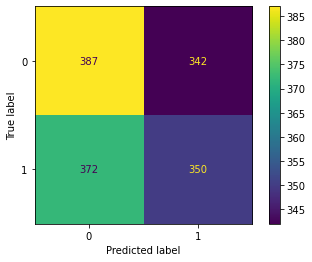

In [336]:
disp = cmd(confusion_matrix = cm, display_labels = rf_best.classes_)
disp.plot()
plt.show

In [337]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [338]:
accuracy_score(y_test, best_preds) #Correct Predictions/Total Predictions

0.5079255685733977

In [339]:
precision_score(y_test, best_preds) #How many of the predicted home covers were correct

0.5057803468208093

In [340]:
recall_score(y_test, best_preds) #How many of all the home covers were we able to predict

0.48476454293628807

In [341]:
df

,teamDayOff,avg_poss,Off_Eff,Def_Eff,Net_Eff,Prev_EFG,Prev_TS,Prev_3Ppct,Prev_3PAP48,Prev_FTpct,...,Official3_Tom Washington,Official3_Tony Brothers,Official3_Tony Brown,Official3_Tre Maddox,Official3_Tyler Ford,Official3_Violet Palmer,Official3_Vladimir Voyard-Tadal,Official3_Zach Zarba,Official3_nan nan,Cover?
0,0,88.940900,105.688200,94.444700,11.243500,0.500000,0.529995,0.350000,20.000000,0.681818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,94.983200,126.338100,112.651500,13.686600,0.594937,0.644607,0.500000,16.000000,0.812500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,91.579000,99.367800,108.103400,-8.735600,0.512987,0.501986,0.230769,13.000000,0.387097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,94.371500,89.009900,79.473100,9.536800,0.394118,0.445671,0.280000,25.000000,0.809524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,91.564100,96.107500,98.291800,-2.184300,0.395604,0.442834,0.352941,17.000000,0.842105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,2,98.320457,105.166778,110.320910,-5.154132,0.512067,0.544915,0.350190,29.218141,0.756511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7373,1,100.298523,109.350380,105.228548,4.121832,0.534821,0.568240,0.367787,29.580967,0.752294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7374,2,98.772383,110.493546,110.357602,0.135943,0.527256,0.564630,0.353994,26.840565,0.746976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7375,2,96.857905,109.138401,106.588472,2.549930,0.511004,0.549319,0.366185,28.049555,0.801059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df